# Imports


In [ ]:
! pip install gdown
!gdown 13W3xPoFiK4zgPEq0PYByT4qYsZK1v1KK

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression, Perceptron, SGDClassifier
from sklearn.model_selection import train_test_split
import sklearn.datasets as datasets
import matplotlib.pyplot as plt
ROOT_LOCAL = "D:\desk top folders\ML\MachineLearning2024W"
%cd {ROOT_LOCAL}

D:\desk top folders\ML\MachineLearning2024W


# Q1

## Section 3 - Generate Dataset

In [ ]:
def plot_3d_dataset(points, labels, title):
    # Generated by ChatGPT
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    n = labels.max()+1
    colors = cm.rainbow(np.linspace(0, 1,n ))
    for i in range(n):
        ax.scatter(points[labels == i, 0], points[labels == i, 1], points[labels == i, 2], c=[colors[i]], label=f'Class {i}')

    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(title)
    ax.legend()
    plt.show()
    import matplotlib.pyplot as plt

def plot_2d_dataset(X, Y):

    plt.figure(figsize=(8, 6))

    # Plot each class
    unique_labels = set(Y)
    colors = plt.cm.tab10(np.linspace(0, 1, len(unique_labels)))
    for i, label in enumerate(unique_labels):
        class_data = X[Y == label]
        plt.scatter(class_data[:, 0], class_data[:, 1], color=colors[i], label=f'Class {label}')

    plt.title('Blobs Dataset')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.grid(True)
    plt.show()



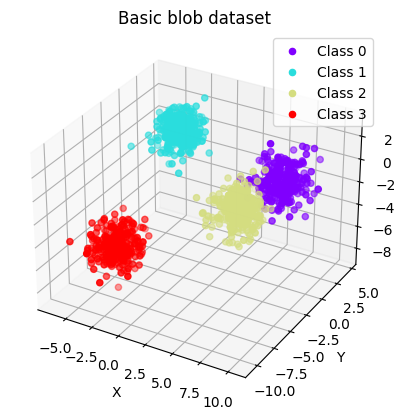

In [ ]:
X_blob_basic, Y_blob_basic= datasets.make_blobs([300,300,300,300],n_features=3,random_state=53)
plot_3d_dataset(X_blob_basic,Y_blob_basic,"Basic blob dataset")

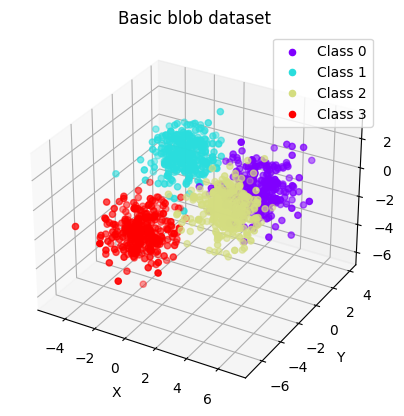

In [ ]:
X_blob_bounded_box, Y_blob_bounded_box= datasets.make_blobs([300,300,300,300],center_box=[-5,5],n_features=3,random_state=53)
plot_3d_dataset(X_blob_bounded_box,Y_blob_bounded_box,"Basic blob dataset")

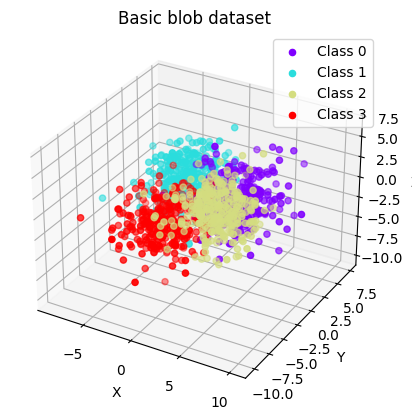

In [ ]:
X_blob_bounded_box_std, Y_blob_bounded_box_std= datasets.make_blobs([300,300,300,300],center_box=[-5,5],cluster_std=2,n_features=3,random_state=53)
plot_3d_dataset(X_blob_bounded_box_std,Y_blob_bounded_box_std,"Basic blob dataset")

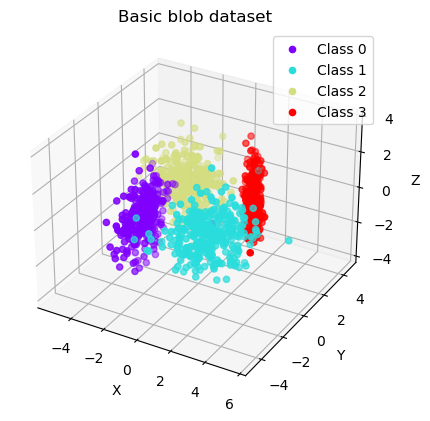

In [ ]:
X_cls_basic, Y_cls_basic= datasets.make_classification(1200,
                                                       n_features=3,
                                                       n_classes=4,
                                                       n_redundant=0,
                                                       n_informative=2,
                                                       n_clusters_per_class=1,
                                                       class_sep=2,
                                                       random_state=53)

plot_3d_dataset(X_cls_basic,Y_cls_basic,"Basic blob dataset")

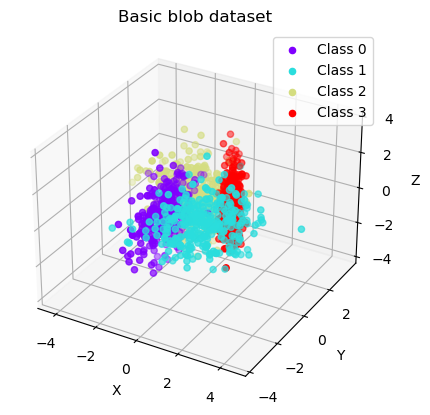

In [ ]:
X_cls_sep1, Y_cls_sep1= datasets.make_classification(1200,
                                                  n_features=3,
                                                  n_classes=4,
                                                  n_redundant=0,
                                                  n_informative=2,
                                                  n_clusters_per_class=1,
                                                  class_sep=1,
                                                  random_state=53)

plot_3d_dataset(X_cls_sep1,Y_cls_sep1,"Basic blob dataset")

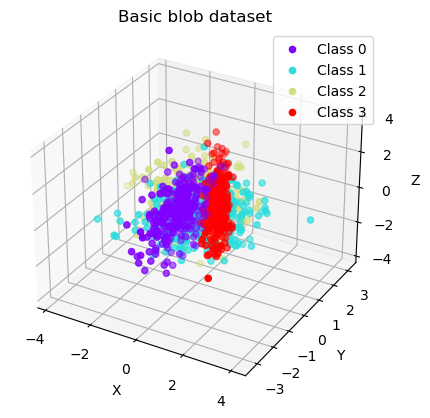

In [ ]:
X_cls_sep05, Y_cls_sep05= datasets.make_classification(1200,
                                                  n_features=3,
                                                  n_classes=4,
                                                  n_redundant=0,
                                                  n_informative=2,
                                                  n_clusters_per_class=1,
                                                  class_sep=0.5,
                                                  random_state=53)

plot_3d_dataset(X_cls_sep05,Y_cls_sep05,"Basic blob dataset")


## Section 3 - Train Linear Model

In [ ]:
X = X_blob_bounded_box_std
Y = Y_blob_bounded_box_std

X_train_raw, X_test_raw, Y_train, Y_test = train_test_split(X,Y,train_size=0.8,random_state=53)

In [ ]:
scaler = preprocessing.StandardScaler().fit(X_train_raw)
X_train = scaler.transform(X_train_raw)
X_test = scaler.transform(X_test_raw)
s = preprocessing.StandardScaler().fit(X_train)
print("train mean and var is equal to",s.mean_,s.var_)
s = preprocessing.StandardScaler().fit(X_test)
print("test mean and var is equal to",s.mean_,s.var_)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

train mean and var is equal to [ 2.85882429e-16 -8.53483950e-17 -2.84494650e-17] [1. 1. 1.]
test mean and var is equal to [-0.15555446 -0.1622994  -0.05613437] [0.9724128  1.10044181 0.88858834]
(960, 3) (960,) (240, 3) (240,)


### Logistic Regression

In [ ]:
LR0_Q1 = {}
for solver in ['sag', 'saga', 'lbfgs', 'newton-cg']:
    LR0_Q1[solver] = LogisticRegression(penalty="l2",
										dual=False,
										C=1.0,
										solver=solver,
										max_iter=1500,
										multi_class="multinomial",
										random_state=53).fit(X_train_raw,Y_train)
for model in LR0_Q1.keys():
    print(f"model with {model} solver and multi_class=multinomial score is equal ot {LR0_Q1[model].score(X_test_raw,Y_test)}")

model with sag solver and multi_class=multinomial score is equal ot 0.7708333333333334
model with saga solver and multi_class=multinomial score is equal ot 0.7708333333333334
model with lbfgs solver and multi_class=multinomial score is equal ot 0.7708333333333334
model with newton-cg solver and multi_class=multinomial score is equal ot 0.7708333333333334


In [ ]:
LR1_Q1 = {}
for solver in ['sag', 'saga', 'lbfgs', 'newton-cg']:
    LR1_Q1[solver] = LogisticRegression(penalty="l2",
										dual=False,
										C=1.0,
										solver=solver,
										max_iter=1500,
										multi_class="multinomial",
										random_state=53).fit(X_train,Y_train)
for model in LR1_Q1.keys():
    print(f"model with {model} solver and multi_class=multinomial score is equal ot {LR1_Q1[model].score(X_test,Y_test)}")

print("\n")
LR2_Q1={}
for solver in ['sag', 'saga', 'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky']:
    LR2_Q1[solver] = LogisticRegression(penalty="l2",
										dual=False,
										C=1.0,
										solver=solver,
										max_iter=1500,
										multi_class='ovr',
										random_state=53).fit(X_train,Y_train)
for model in LR2_Q1.keys():
    print(f"model with {model} solver and multi_class=over score is equal ot {LR2_Q1[model].score(X_test,Y_test)}")

model with sag solver and multi_class=multinomial score is equal ot 0.775
model with saga solver and multi_class=multinomial score is equal ot 0.775
model with lbfgs solver and multi_class=multinomial score is equal ot 0.775
model with newton-cg solver and multi_class=multinomial score is equal ot 0.775


model with sag solver and multi_class=over score is equal ot 0.7708333333333334
model with saga solver and multi_class=over score is equal ot 0.7708333333333334
model with lbfgs solver and multi_class=over score is equal ot 0.7708333333333334
model with liblinear solver and multi_class=over score is equal ot 0.775
model with newton-cg solver and multi_class=over score is equal ot 0.7708333333333334
model with newton-cholesky solver and multi_class=over score is equal ot 0.7708333333333334


In [ ]:
LR3_Q1 = {}
for solver in ['sag', 'saga', 'lbfgs', 'newton-cg']:
    best_score = -1
    for i in np.arange(0.01,1.5,0.01):
        m = LogisticRegression(penalty="l2",
							   dual=False,
							   C=i,
							   solver=solver,
							   max_iter=1500,
							   multi_class="multinomial",
							   random_state=53).fit(X_train,Y_train)
        if m.score(X_test,Y_test)>best_score:
            best_score = m.score(X_test,Y_test)
            LR3_Q1[solver]= m
for model in LR3_Q1.keys():
    print(f"model with {model} solver and multi_class=multinomial score is equal ot {LR3_Q1[model].score(X_test,Y_test)}. C={LR3_Q1[model].get_params()['C']}")

print("\n")
LR4_Q1={}
for solver in ['sag', 'saga', 'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky']:
    best_score = -1
    for i in np.arange(0.01,1.5,0.01):
        m = LogisticRegression(penalty="l2",
							   dual=False,
							   C=i,
							   solver=solver,
							   max_iter=1500,
							   multi_class="ovr",
							   random_state=53).fit(X_train,Y_train)
        if m.score(X_test,Y_test)>best_score:
            best_score = m.score(X_test,Y_test)
            LR4_Q1[solver]= m
for model in LR4_Q1.keys():
    print(f"model with {model} solver and multi_class=over score is equal ot {LR4_Q1[model].score(X_test,Y_test)}. C={LR4_Q1[model].get_params()['C']}")

model with sag solver and multi_class=multinomial score is equal ot 0.7791666666666667. C=0.06999999999999999
model with saga solver and multi_class=multinomial score is equal ot 0.7791666666666667. C=0.06999999999999999
model with lbfgs solver and multi_class=multinomial score is equal ot 0.7791666666666667. C=0.06999999999999999
model with newton-cg solver and multi_class=multinomial score is equal ot 0.7791666666666667. C=0.06999999999999999


model with sag solver and multi_class=over score is equal ot 0.775. C=0.02
model with saga solver and multi_class=over score is equal ot 0.775. C=0.02
model with lbfgs solver and multi_class=over score is equal ot 0.775. C=0.02
model with liblinear solver and multi_class=over score is equal ot 0.7791666666666667. C=0.02
model with newton-cg solver and multi_class=over score is equal ot 0.775. C=0.02
model with newton-cholesky solver and multi_class=over score is equal ot 0.775. C=0.02


In [ ]:
LR5_Q1=None
best_score = -1
for i in np.linspace(1e-6,1e-1,num=200):

    m = LogisticRegression(penalty="l2",
						   dual=False,
						   C=0.07,
						   solver="newton-cg",
						   max_iter=1500,
						   multi_class="multinomial",
						   tol=i,
						   random_state=53).fit(X_train,Y_train)
    if m.score(X_test,Y_test)>best_score:
        best_score = m.score(X_test,Y_test)
        LR5_Q1= m
print(f"model with newton-cg solver and multi_class=multinomial score is equal ot {LR5_Q1.score(X_test,Y_test)}. tol={LR5_Q1.get_params()['tol']}")

LR6_Q1=None
best_score = -1
for i in np.linspace(1e-6,1e-1,num=200):
    m = LogisticRegression(penalty="l2",
						   dual=False,
						   C=0.02,
						   solver="liblinear",
						   max_iter=1500,
						   multi_class="ovr",
						   tol=i,
						   random_state=53).fit(X_train,Y_train)
    if m.score(X_test,Y_test)>best_score:
        best_score = m.score(X_test,Y_test)
        LR6_Q1= m
print(f"model with newton-cg solver and multi_class=over score is equal ot {LR6_Q1.score(X_test,Y_test)}. tol={LR6_Q1.get_params()['tol']}")

model with newton-cg solver and multi_class=multinomial score is equal ot 0.7791666666666667. tol=1e-06
model with newton-cg solver and multi_class=over score is equal ot 0.7791666666666667. tol=1e-06


In [ ]:
LR7_Q1 = LogisticRegression(penalty="l2",
							   dual=True,
							   C=0.02,
							   solver="liblinear",
							   max_iter=1500,
							   multi_class="ovr",
							   tol=1e-6,
							   random_state=53).fit(X_train,Y_train)
LR7_Q1.score(X_test,Y_test)

0.7791666666666667

### SGDClassifier

In [ ]:
SGD1_Q1 = {}
for loss in ['hinge', 'log_loss', 'perceptron', 'squared_error']:
    SGD1_Q1[loss] = SGDClassifier(penalty="l2",
								   loss=loss,
								   alpha = 0.0001,
								   max_iter =4000,
                                   tol = 1e-3,
                                   learning_rate = 'optimal',
                                   eta0 = 0,
                                   early_stopping=True,
                                   validation_fraction=0.1,
                                   n_iter_no_change = 10,
								   random_state=53).fit(X_train,Y_train)
for loss in SGD1_Q1.keys():
    print(f"model with {loss} loss function score is equal ot {SGD1_Q1[loss].score(X_train,Y_train)} on the train set")
    print(f"model with {loss} loss function score is equal ot {SGD1_Q1[loss].score(X_test,Y_test)} on the test set\n")



model with hinge loss function score is equal ot 0.734375 on the train set
model with hinge loss function score is equal ot 0.7458333333333333 on the test set

model with log_loss loss function score is equal ot 0.7 on the train set
model with log_loss loss function score is equal ot 0.7416666666666667 on the test set

model with perceptron loss function score is equal ot 0.6947916666666667 on the train set
model with perceptron loss function score is equal ot 0.7125 on the test set

model with squared_error loss function score is equal ot 0.21979166666666666 on the train set
model with squared_error loss function score is equal ot 0.22083333333333333 on the test set



In [ ]:
SGD2_Q1 = {}
for loss in ['hinge', 'log_loss', 'perceptron']:
    SGD2_Q1[loss] = SGDClassifier(penalty="l2",
								   loss=loss,
								   alpha = 0.0001,
								   max_iter =4000,
                                   tol = 1e-3,
                                   learning_rate = 'adaptive',
                                   eta0 = 0.0001,
                                   early_stopping=True,
                                   validation_fraction=0.1,
                                   n_iter_no_change = 10,
								   random_state=53).fit(X_train,Y_train)
for loss in SGD2_Q1.keys():
    print(f"model with {loss} loss function score is equal ot {SGD2_Q1[loss].score(X_train,Y_train)} on the train set")
    print(f"model with {loss} loss function score is equal ot {SGD2_Q1[loss].score(X_test,Y_test)} on the test set\n")


model with hinge loss function score is equal ot 0.753125 on the train set
model with hinge loss function score is equal ot 0.7708333333333334 on the test set

model with log_loss loss function score is equal ot 0.75625 on the train set
model with log_loss loss function score is equal ot 0.775 on the test set

model with perceptron loss function score is equal ot 0.6729166666666667 on the train set
model with perceptron loss function score is equal ot 0.6791666666666667 on the test set



In [ ]:
SGD3_Q1 = {}
for loss in ['hinge', 'log_loss', 'perceptron']:
    best_score = -1
    for i in np.linspace(1e-3,50,20):
        m = SGDClassifier(penalty="l2",
					      loss=loss,
					      alpha = 0.0001,
					      max_iter =4000,
                          tol = 1e-3,
                          learning_rate = 'adaptive',
                          eta0 = i,
                          early_stopping=True,
                          validation_fraction=0.1,
                          n_iter_no_change = 10,
					      random_state=53).fit(X_train,Y_train)
        if m.score(X_train,Y_train) > best_score:
            SGD3_Q1[loss]=m
            best_score = m.score(X_train,Y_train)

for loss in SGD3_Q1.keys():
    print(f"model with {loss} loss function score is equal ot {SGD3_Q1[loss].score(X_train,Y_train)} on the train set. eta0={SGD3_Q1[loss].get_params()['eta0']}")
    print(f"model with {loss} loss function score is equal ot {SGD3_Q1[loss].score(X_test,Y_test)} on the test set. eta0={SGD3_Q1[loss].get_params()['eta0']}\n")



model with hinge loss function score is equal ot 0.7583333333333333 on the train set. eta0=31.579315789473686
model with hinge loss function score is equal ot 0.7708333333333334 on the test set. eta0=31.579315789473686

model with log_loss loss function score is equal ot 0.7625 on the train set. eta0=0.001
model with log_loss loss function score is equal ot 0.775 on the test set. eta0=0.001

model with perceptron loss function score is equal ot 0.7166666666666667 on the train set. eta0=39.473894736842105
model with perceptron loss function score is equal ot 0.6958333333333333 on the test set. eta0=39.473894736842105



In [ ]:
SGD4_Q1 = {}
# ['hinge', 'log_loss']:
best_score = -1
for i in np.linspace(1e-6,1e-2,20):
	m = SGDClassifier(penalty="l2",
				      loss='hinge',
				      alpha = 0.0001,
				      max_iter =4000,
                      tol = i,
                      learning_rate = 'adaptive',
                      eta0 = 31.5793,
                      early_stopping=True,
                      validation_fraction=0.1,
                      n_iter_no_change = 10,
				      random_state=53).fit(X_train,Y_train)
	if m.score(X_train,Y_train) > best_score:
	    SGD4_Q1["hinge"]=m
	    best_score = m.score(X_train,Y_train)

for i in np.linspace(1e-6,1e-2,20):
    m = SGDClassifier(penalty="l2",
				      loss='log_loss',
				      alpha = 0.0001,
				      max_iter =4000,
                      tol = i,
                      learning_rate = 'adaptive',
                      eta0 = 0.001,
                      early_stopping=True,
                      validation_fraction=0.1,
                      n_iter_no_change = 10,
				      random_state=53).fit(X_train,Y_train)
    if m.score(X_train,Y_train) > best_score:
        SGD4_Q1["log_loss"]=m
        best_score = m.score(X_train,Y_train)

for loss in SGD4_Q1.keys():
    print(f"model with {loss} loss function score is equal ot {SGD4_Q1[loss].score(X_train,Y_train)} on the train set. tol={SGD4_Q1[loss].get_params()['tol']}")
    print(f"model with {loss} loss function score is equal ot {SGD4_Q1[loss].score(X_test,Y_test)} on the test set. tol={SGD4_Q1[loss].get_params()['tol']}\n")



model with hinge loss function score is equal ot 0.7583333333333333 on the train set. tol=1e-06
model with hinge loss function score is equal ot 0.7708333333333334 on the test set. tol=1e-06

model with log_loss loss function score is equal ot 0.7625 on the train set. tol=1e-06
model with log_loss loss function score is equal ot 0.775 on the test set. tol=1e-06



In [ ]:
SGD5_Q1 = {}
# ['hinge', 'log_loss']:
best_score = -1
for i in np.linspace(1e-6,1e-2,20):
	m = SGDClassifier(penalty="l2",
				      loss='hinge',
				      alpha = i,
				      max_iter =4000,
                      tol = 1e-6,
                      learning_rate = 'adaptive',
                      eta0 = 31.5793,
                      early_stopping=True,
                      validation_fraction=0.1,
                      n_iter_no_change = 10,
				      random_state=53).fit(X_train,Y_train)
	if m.score(X_train,Y_train) > best_score:
	    SGD5_Q1["hinge"]=m
	    best_score = m.score(X_train,Y_train)

for i in np.linspace(1e-6,1e-2,20):
    m = SGDClassifier(penalty="l2",
				      loss='log_loss',
				      alpha = i,
				      max_iter =4000,
                      tol = 1e-6,
                      learning_rate = 'adaptive',
                      eta0 = 0.001,
                      early_stopping=True,
                      validation_fraction=0.1,
                      n_iter_no_change = 10,
				      random_state=53).fit(X_train,Y_train)
    if m.score(X_train,Y_train) > best_score:
        SGD5_Q1["log_loss"]=m
        best_score = m.score(X_train,Y_train)

for loss in SGD5_Q1.keys():
    print(f"model with {loss} loss function score is equal ot {SGD5_Q1[loss].score(X_train,Y_train)} on the train set. alpha={SGD5_Q1[loss].get_params()['alpha']}")
    print(f"model with {loss} loss function score is equal ot {SGD5_Q1[loss].score(X_test,Y_test)} on the test set. aplha={SGD5_Q1[loss].get_params()['alpha']}\n")



model with hinge loss function score is equal ot 0.759375 on the train set. alpha=0.0021060526315789477
model with hinge loss function score is equal ot 0.7666666666666667 on the test set. aplha=0.0021060526315789477

model with log_loss loss function score is equal ot 0.7677083333333333 on the train set. alpha=0.00842121052631579
model with log_loss loss function score is equal ot 0.7791666666666667 on the test set. aplha=0.00842121052631579



In [ ]:
SGD6_Q1 = {}
# ['hinge', 'log_loss']:
best_score = -1
for i in [0.1,0.15,0.2]:
	m = SGDClassifier(penalty="l2",
				      loss='hinge',
				      alpha = 0.00211,
				      max_iter =4000,
                      tol = 1e-6,
                      learning_rate = 'adaptive',
                      eta0 = 31.5793,
                      early_stopping=True,
                      validation_fraction=0.1,
                      n_iter_no_change = 10,
				      random_state=53).fit(X_train,Y_train)
	if m.score(X_train,Y_train) > best_score:
	    SGD6_Q1["hinge"]=m
	    best_score = m.score(X_train,Y_train)

for i in [0.1,0.15,0.2]:
    m = SGDClassifier(penalty="l2",
				      loss='log_loss',
				      alpha = 0.00842,
				      max_iter =4000,
                      tol = 1e-6,
                      learning_rate = 'adaptive',
                      eta0 = 0.001,
                      early_stopping=True,
                      validation_fraction=0.1,
                      n_iter_no_change = 10,
				      random_state=53).fit(X_train,Y_train)
    if m.score(X_train,Y_train) > best_score:
        SGD6_Q1["log_loss"]=m
        best_score = m.score(X_train,Y_train)

for loss in SGD6_Q1.keys():
    print(f"model with {loss} loss function score is equal ot {SGD6_Q1[loss].score(X_train,Y_train)} on the train set. eta0={SGD6_Q1[loss].get_params()['alpha']}")
    print(f"model with {loss} loss function score is equal ot {SGD6_Q1[loss].score(X_test,Y_test)} on the test set. eta0={SGD6_Q1[loss].get_params()['alpha']}\n")



model with hinge loss function score is equal ot 0.7572916666666667 on the train set. eta0=0.00211
model with hinge loss function score is equal ot 0.7666666666666667 on the test set. eta0=0.00211

model with log_loss loss function score is equal ot 0.7677083333333333 on the train set. eta0=0.00842
model with log_loss loss function score is equal ot 0.7791666666666667 on the test set. eta0=0.00842



## Decision Area

<ipython-input-44-fc335689c61a>:25: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



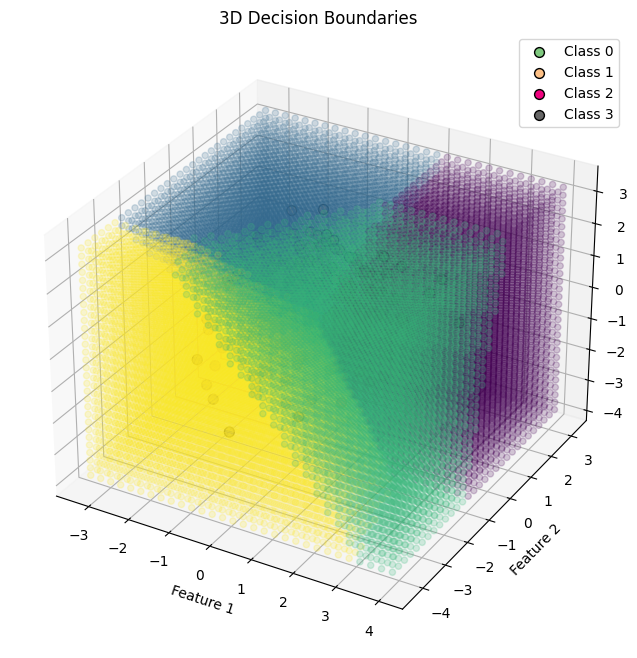

<ipython-input-44-fc335689c61a>:25: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



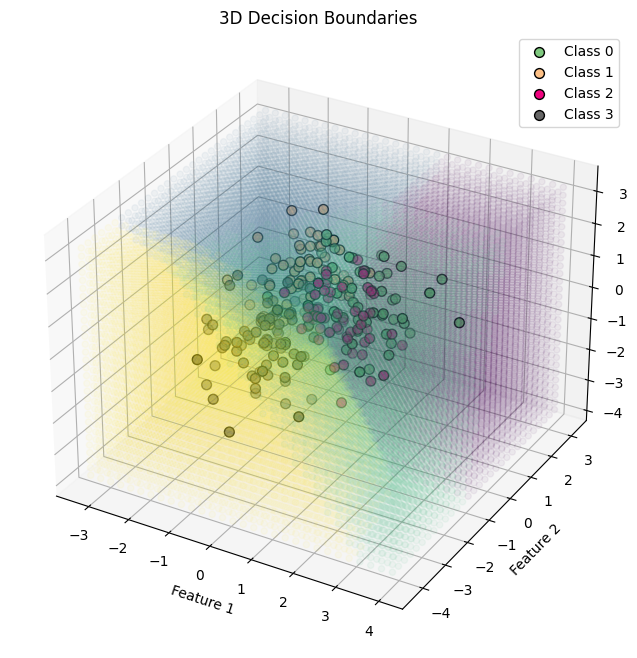

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d_decision_boundaries(X, y, model, alpha = 0.2):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    z_min, z_max = X[:, 2].min() - 1, X[:, 2].max() + 1

    # Create a grid of points
    xx, yy, zz = np.meshgrid(np.linspace(x_min, x_max, 30),
                             np.linspace(y_min, y_max, 30),
                             np.linspace(z_min, z_max, 30))

    mesh_points = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
    Z = model.predict(mesh_points)

    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the decision boundaries with low opacity
    ax.scatter(mesh_points[:, 0], mesh_points[:, 1], mesh_points[:, 2], c=Z, alpha=alpha)

    # Then plot the actual data points on top with high visibility
    color_map = plt.cm.get_cmap('Accent')  # Get a colormap
    distinct_colors = [color_map(i) for i in np.linspace(0, 1, len(np.unique(y)))]
    for i, class_label in enumerate(np.unique(y)):
        xi = X[y == class_label, 0]
        yi = X[y == class_label, 1]
        zi = X[y == class_label, 2]
        ax.scatter(xi, yi, zi, color=distinct_colors[i], edgecolor='k', s=50, label=f'Class {class_label}')

    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    plt.title("3D Decision Boundaries")
    plt.legend()
    plt.show()

plot_3d_decision_boundaries(X_test, Y_test, SGD6_Q1["log_loss"], alpha = 0.2)
plot_3d_decision_boundaries(X_test, Y_test, SGD6_Q1["log_loss"], alpha = 0.05)


In [ ]:
import numpy as np
import plotly.graph_objects as go
from sklearn.datasets import make_blobs
from sklearn.linear_model import SGDClassifier

def plot_3d_decision_boundaries_interactive(X, y, model):
    # Predict the classes for the actual data points to find misclassified points
    y_pred = model.predict(X)
    misclassified = y_pred != y

    # Create a grid of points to predict the classes for boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    z_min, z_max = X[:, 2].min() - 1, X[:, 2].max() + 1

    xx, yy, zz = np.meshgrid(np.linspace(x_min, x_max, 30),
                             np.linspace(y_min, y_max, 30),
                             np.linspace(z_min, z_max, 30))

    mesh_points = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
    Z = model.predict(mesh_points)

    # Plot the decision boundary points with low opacity
    boundary_trace = go.Scatter3d(
        x=mesh_points[:, 0],
        y=mesh_points[:, 1],
        z=mesh_points[:, 2],
        mode='markers',
        marker=dict(
            size=3,
            color=Z,  # coloring by predicted class
            opacity=0.2
        )
    )

    # Plot the actual data points
    data_trace = go.Scatter3d(
        x=X[:, 0],
        y=X[:, 1],
        z=X[:, 2],
        mode='markers',
        marker=dict(
            size=5,
            color=y,  # coloring by actual class
            line=dict(
                color='Black',
                width=2
            )
        )
    )

    # Plot misclassified points with higher visibility
    misclassified_trace = go.Scatter3d(
        x=X[misclassified, 0],
        y=X[misclassified, 1],
        z=X[misclassified, 2],
        mode='markers',
        marker=dict(
            size=8,
            color='Red',  # red color for misclassified points
            line=dict(
                color='Black',
                width=2
            )
        ),
        name='Misclassified'
    )

    fig = go.Figure(data=[boundary_trace, data_trace, misclassified_trace])
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0), title="3D Decision Boundaries with Misclassified Points")
    fig.show()

plot_3d_decision_boundaries_interactive(X_test, Y_test, SGD6_Q1["log_loss"])


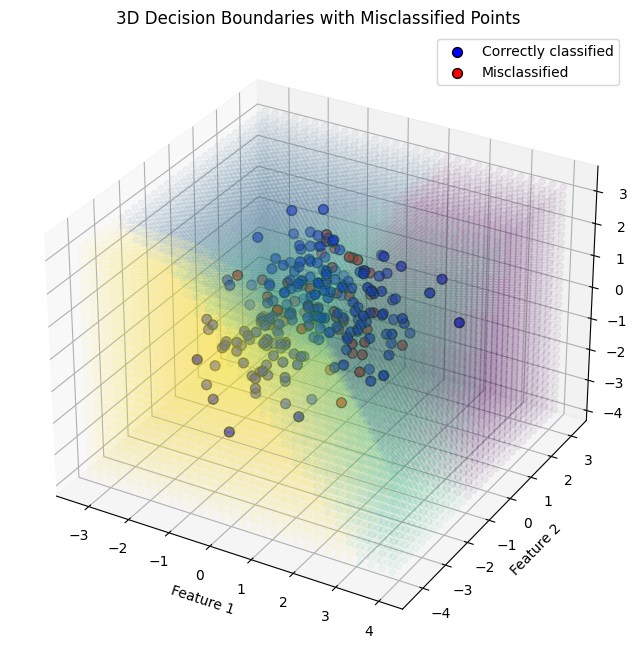

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
from sklearn.linear_model import SGDClassifier

def plot_decision_boundaries(X, y, model):
    # Predicting using the model
    y_pred = model.predict(X)
    misclassified_mask = y_pred != y  # Find where predictions and true labels don't match

    # Create a mesh grid for plotting decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    z_min, z_max = X[:, 2].min() - 1, X[:, 2].max() + 1

    xx, yy, zz = np.meshgrid(np.linspace(x_min, x_max, 30),
                             np.linspace(y_min, y_max, 30),
                             np.linspace(z_min, z_max, 30))

    grid_points = np.c_[xx.ravel(), yy.ravel(), zz.ravel()]
    Z = model.predict(grid_points)
    Z = Z.reshape(xx.shape)

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the decision boundaries
    ax.scatter(grid_points[:, 0], grid_points[:, 1], grid_points[:, 2], c=Z, alpha=0.05)

    # Plot correctly classified points
    ax.scatter(X[~misclassified_mask, 0], X[~misclassified_mask, 1], X[~misclassified_mask, 2],
               color='blue', edgecolor='k', s=50, label='Correctly classified')

    # Plot misclassified points
    ax.scatter(X[misclassified_mask, 0], X[misclassified_mask, 1], X[misclassified_mask, 2],
               color='red', edgecolor='k', s=50, label='Misclassified')

    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')
    plt.title("3D Decision Boundaries with Misclassified Points")
    plt.legend()
    plt.show()

plot_decision_boundaries(X_test, Y_test, SGD6_Q1["log_loss"])


# Q3

## Initaialize and Load Data


In [ ]:
main_df = pd.read_csv("Projects\\mini project 1\\Q3\\Dataset\\weatherHistory.csv")
temp = "Temperature (C)"
app_temp = "Apparent Temperature (C)"
humidity = "Humidity"
main_df.head(5)

Formatted Date        Summary Precip Type  Temperature (C)  \
0  2006-04-01 00:00:00.000 +0200  Partly Cloudy        rain         9.472222   
1  2006-04-01 01:00:00.000 +0200  Partly Cloudy        rain         9.355556   
2  2006-04-01 02:00:00.000 +0200  Mostly Cloudy        rain         9.377778   
3  2006-04-01 03:00:00.000 +0200  Partly Cloudy        rain         8.288889   
4  2006-04-01 04:00:00.000 +0200  Mostly Cloudy        rain         8.755556   

   Apparent Temperature (C)  Humidity  Wind Speed (km/h)  \
0                  7.388889      0.89            14.1197   
1                  7.227778      0.86            14.2646   
2                  9.377778      0.89             3.9284   
3                  5.944444      0.83            14.1036   
4                  6.977778      0.83            11.0446   

   Wind Bearing (degrees)  Visibility (km)  Loud Cover  Pressure (millibars)  \
0                   251.0          15.8263         0.0               1015.13   
1                   259.0          15.8263         0.0               1015.63   
2                   204.0          14.9569         0.0               1015.94   
3                   269.0          15.8263         0.0               1016.41   
4                   259.0          15.8263         0.0               1016.51   

                       Daily Summary  
0  Partly cloudy throughout the day.  
1  Partly cloudy throughout the day.  
2  Partly cloudy throughout the day.  
3  Partly cloudy throughout the day.  
4  Partly cloudy throughout the day.

In [ ]:
df = main_df[[temp,app_temp,humidity]]
df.head(5)

Temperature (C)  Apparent Temperature (C)  Humidity
0         9.472222                  7.388889      0.89
1         9.355556                  7.227778      0.86
2         9.377778                  9.377778      0.89
3         8.288889                  5.944444      0.83
4         8.755556                  6.977778      0.83

## Section 1 - Covariance and Histogram of Data


                          Temperature (C)  Apparent Temperature (C)  Humidity
Temperature (C)                 91.232037                101.418283 -1.180462
Apparent Temperature (C)       101.418283                114.422544 -1.259941
Humidity                        -1.180462                 -1.259941  0.038210


<AxesSubplot:>

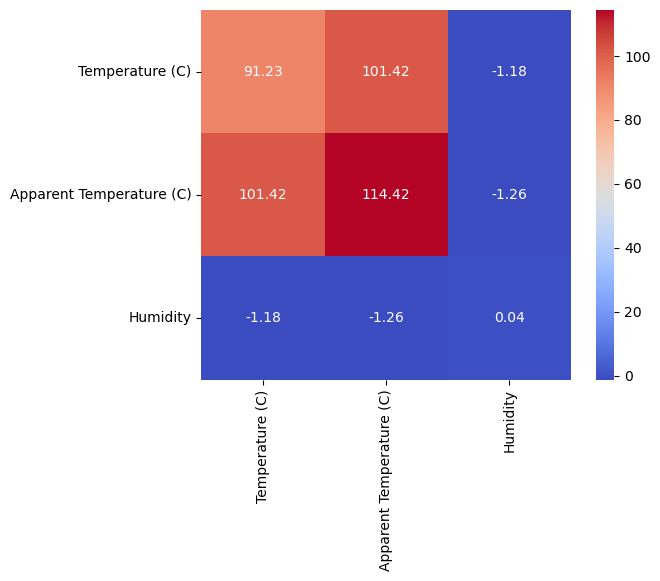

In [ ]:
covariance_matrix = df.cov()
print(covariance_matrix)
sns.heatmap(covariance_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)


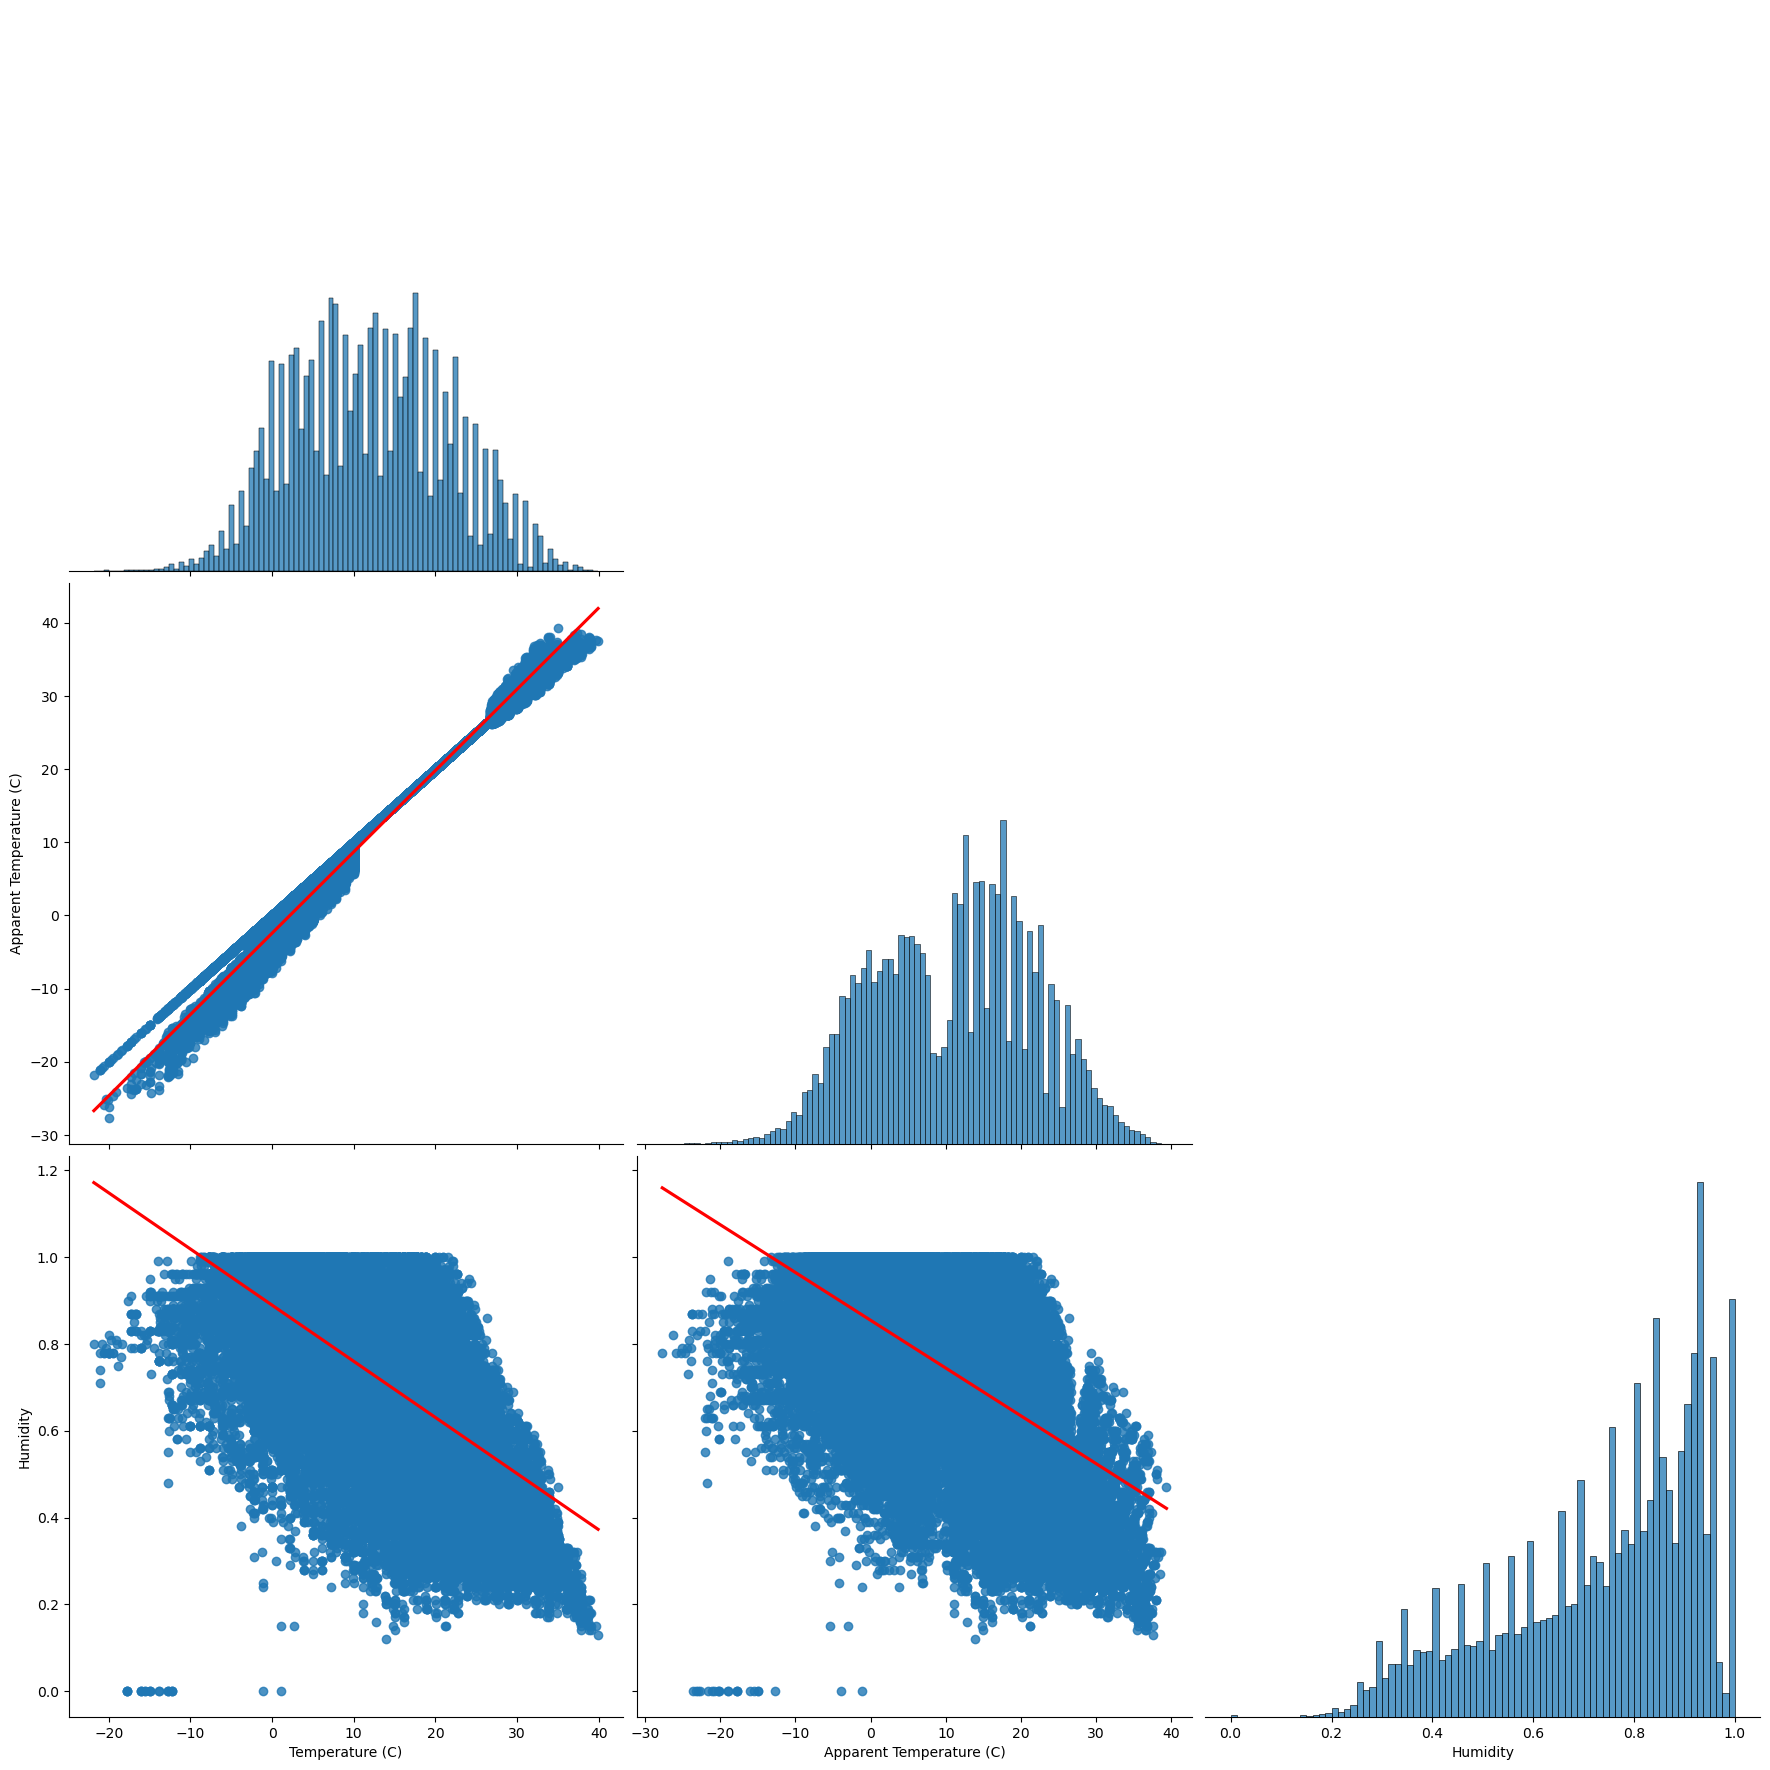

In [ ]:
sns.pairplot(df,kind='reg', height = 6, corner= True,plot_kws={'line_kws':{'color':'red'}})
plt.show()

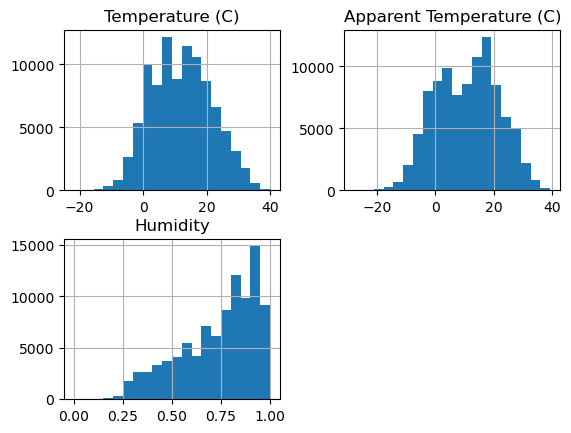

In [ ]:
histogram = df.hist(bins = 20)

## LS and RLS Approximation

In [ ]:
train_set, test_set = train_test_split(df,test_size=0.2,random_state=53)

temp_train = train_set[temp]
app_temp_train = train_set[app_temp]
humidity_train = train_set[humidity]

temp_test = test_set[temp]
app_temp_test = test_set[app_temp]
humidity_test = test_set[humidity]

app_temp_LS  = LinearRegression()
humidity_LS = LinearRegression()
temp_LS = LinearRegression()
dataset = {"Train":{"app_temp":(np.array([temp_train, humidity_train]).T, app_temp_train),
                    "humidity": (np.array([temp_train, app_temp_train]).T, humidity_train),
                    "temp":(np.array([app_temp_train, humidity_train]).T, temp_train)},
           "Test": {"app_temp":(np.array([temp_test, humidity_test]).T, app_temp_test),
                    "humidity": (np.array([temp_test, app_temp_test]).T, humidity_test),
                    "temp":(np.array([app_temp_test, humidity_test]).T, temp_test)}}

models = {"app_temp":app_temp_LS.fit(np.array([temp_train, humidity_train]).T, app_temp_train),
          "humidity": humidity_LS.fit(np.array([temp_train, app_temp_train]).T, humidity_train),
          "temp": temp_LS.fit(np.array([app_temp_train, humidity_train]).T, temp_train)}

In [ ]:
for model in models.keys():
    score = models[model].score(dataset["Train"][model][0],dataset["Train"][model][1])
    print(f"{model} accuracy on training set is equal to {score}")

    score = models[model].score(dataset["Test"][model][0],dataset["Test"][model][1])
    print(f"{model} accuracy on testset is equal to {score}\n")

app_temp accuracy on training set is equal to 0.9863194080189283
app_temp accuracy on testset is equal to 0.9864954840061168

humidity accuracy on training set is equal to 0.4424797955038111
humidity accuracy on testset is equal to 0.44192120432173676

temp accuracy on training set is equal to 0.9871057929817124
temp accuracy on testset is equal to 0.9872771524102542



In [ ]:
date = "Formatted Date"
df_with_date = main_df[[date,temp,app_temp,humidity]]
a = pd.to_datetime(df_with_date[date])
df_with_date[date].iloc[0]

'2006-04-01 00:00:00.000 +0200'

In [ ]:
df_with_date = main_df[[date,temp,app_temp,humidity]]
df_with_date[date] = pd.to_datetime(df_with_date[date],utc= True)

df_with_date['Formatted Date'] = df_with_date['Formatted Date'].dt.strftime('%Y-%m-%d %H:%M:%S.%f')
df_with_date[date] = pd.to_datetime(df_with_date[date])
df_with_date.set_index(date, inplace=True,)
pd.DatetimeIndex(df_with_date.index).to_period('M')

C:\Users\mamdaliof\AppData\Local\Temp\ipykernel_13336\983766743.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_date[date] = pd.to_datetime(df_with_date[date],utc= True)
C:\Users\mamdaliof\AppData\Local\Temp\ipykernel_13336\983766743.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_date['Formatted Date'] = df_with_date['Formatted Date'].dt.strftime('%Y-%m-%d %H:%M:%S.%f')
C:\Users\mamdaliof\AppData\Local\Temp\ipykernel_13336\983766743.py:5: SettingWithCopyWarning: 
A value is trying t

In [ ]:
df_with_date.iloc[0]["name"]

KeyError: 'name'